## PCA(주성분 분석)
---
 - 전체 특성(Feature)에서 주요 특성(Feature) 압축/융합하는 비지도학습
 - fit() + transform() 2단계 거쳐 주성분 분석

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

## [1] 데이터 준비
---

In [2]:
x, y =load_iris(return_X_y=True, as_frame=True)

In [3]:
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

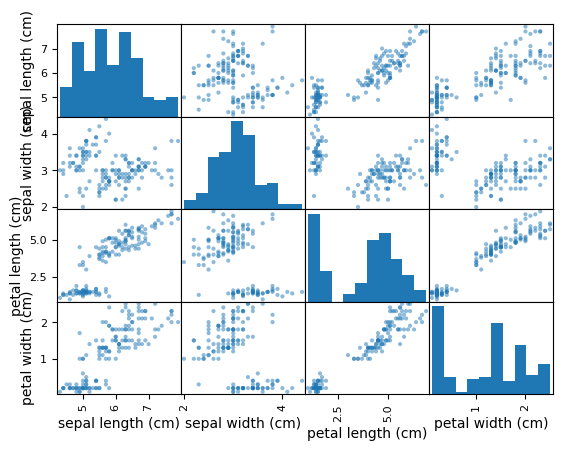

In [26]:
scatter_matrix(x)
plt.show()

In [27]:
x['target']=y

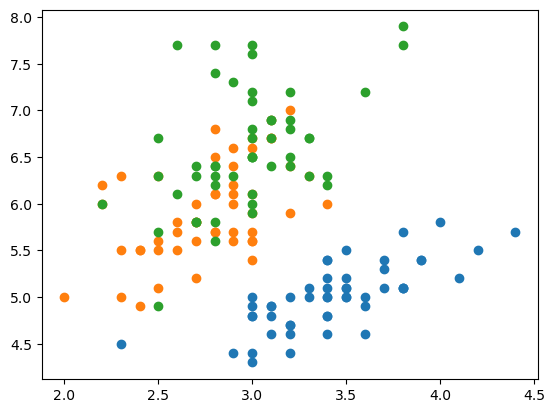

In [33]:
plt.scatter(x[x.target==0]['sepal width (cm)'],x[x.target==0]['sepal length (cm)'])
plt.scatter(x[x.target==1]['sepal width (cm)'],x[x.target==1]['sepal length (cm)'])
plt.scatter(x[x.target==2]['sepal width (cm)'],x[x.target==2]['sepal length (cm)'])

## 데이터 전처리

In [34]:
from sklearn.preprocessing import StandardScaler

In [37]:
x[x.columns[:-1]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
scaler=StandardScaler()
scaler.fit(x[x.columns[:-1]])
x_scaled=scaler.transform(x[x.columns[:-1]])

## PCA 주성분 분석
---
 - iris의 4개 Feature 중에서 주성분 데이터 추출

In [41]:
pca=PCA()

In [42]:
# 지정된 데이터에서 주성분 추출
pca.fit(x_scaled)

PCA()

In [43]:
# 주성분 행렬
pca.singular_values_

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [44]:
# 주성분에 투영 후 분산 정도 설명
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [45]:
# 주성분에 투영후 분산 정도 설명(비율)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

## 주성분 갯수 지정
---
 - 방법1) explained_variance_ratio_의 누적값에서 원하는 분포정도 지정해서 PC갯수 계산
 - 방법2) n_componets = 0.0~1.0: 주성분 투영된 데이터 분포 정도 지정하면 PC갯수 자동 계산


### 방법[1]: explained_variance_ratio_의 누적값으로 PC 차원수 계산

In [46]:
import numpy as np

In [47]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

print(f'주성분 갯수(차원): {d}')

주성분 갯수(차원): 2


In [51]:
# 지정된 PC 갯수로 주성분 데이터 압축/융합
pca=PCA(n_components=d)

In [52]:
pca.fit(x_scaled)

PCA(n_components=2)

In [53]:
irisPCA=pca.transform(x_scaled)

In [54]:
irisPCA.shape

(150, 2)

In [55]:
irisPCA[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

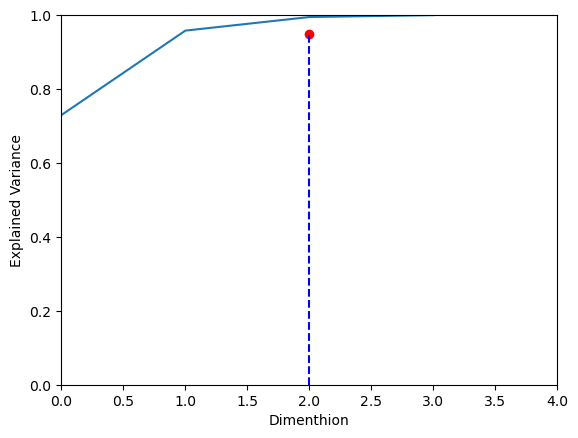

In [87]:
## 주성분과 데이터 투영 분산 정도 시각화
plt.plot(cumsum)
plt.plot(d, 0.95, 'ro')
plt.plot([2,2],[0,0.95], 'b--')
plt.axis([0,4,0,1])
plt.xlabel('Dimention')
plt.ylabel('Explained Variance')
plt.show()

### 방법[2]: n_components=비율값

In [56]:
pca3=PCA(n_components=0.95)

In [57]:
pca3.fit(x_scaled)

PCA(n_components=0.95)

In [65]:
pca3.explained_variance_, pca3.explained_variance_ratio_

(array([2.93808505, 0.9201649 ]), array([0.72962445, 0.22850762]))

In [66]:
irisPCA3=pca3.transform(x_scaled)
irisPCA.shape

(150, 2)

In [88]:
re=pca3.inverse_transform(irisPCA)

In [89]:
re.shape

(150, 4)